## Truy cập đọc data

In [337]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [338]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [339]:
from sklearn.datasets import load_boston
boston_data = load_boston()
#import bộ dữ liệu Boston Housing và lưu trữ nó trong một biến gọi là boston_data

c:\Users\Minh\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

In [340]:
print(boston_data.DESCR)
# in mô tả dữ liệu

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [341]:
print("Keys: ", boston_data.keys())
# Biến boston là một dạng từ điển, vì vậy chúng ta có thể kiểm tra key của nó

Keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [342]:
print("Shape: ", boston_data.data.shape)

Shape:  (506, 13)


In [343]:
print("Feature Names: ", boston_data.feature_names)
# thông tin 13 cột trong dữ liệu boston

Feature Names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [344]:
bos_pd = pd.DataFrame(boston_data.data)
bos_pd.head()
# convert dữ liệu về dạng pandas

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [345]:
bos_pd.columns = boston_data.feature_names
bos_pd.head()
# show tên cột

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [346]:
boston_data.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [347]:
print("Shape of the target data: ", boston_data.target.shape)

Shape of the target data:  (506,)


In [348]:
bos_pd['PRICE']=boston_data.target
bos_pd.head()
# thêm cột price

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [349]:
bos_pd.dtypes
# check kiểu dữ liệu


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

## Tiền xử lý dữ liệu

In [350]:
bos_pd.isnull().sum()
# check dữ liệu sạch

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [351]:
bos_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [352]:
bos_pd.describe().transpose()
#tạo dữ liệu thống kê mô tả và hoá vị cột với hàng của dataframe

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


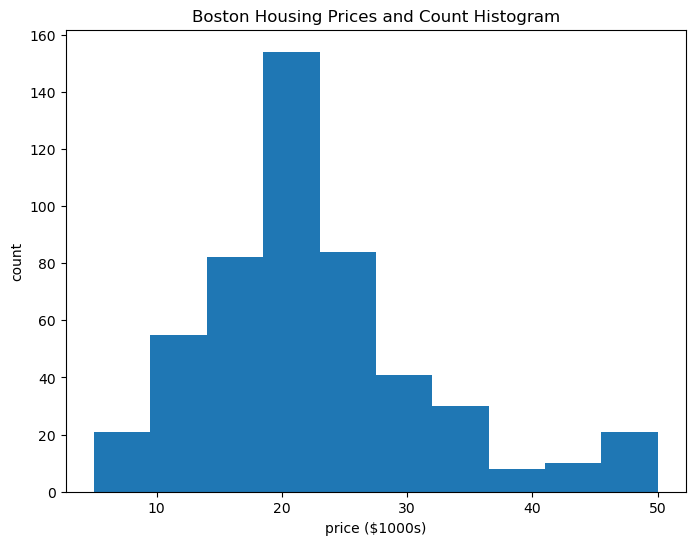

In [353]:
plt.figure(figsize=(8, 6))
plt.hist(bos_pd['PRICE'])
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()
# Tính toán và vẽ biểu đồ theo cột price

C:\Users\Minh\AppData\Local\Temp\ipykernel_1348\1939544530.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bos_pd['PRICE'])\


<Axes: xlabel='PRICE', ylabel='Density'>

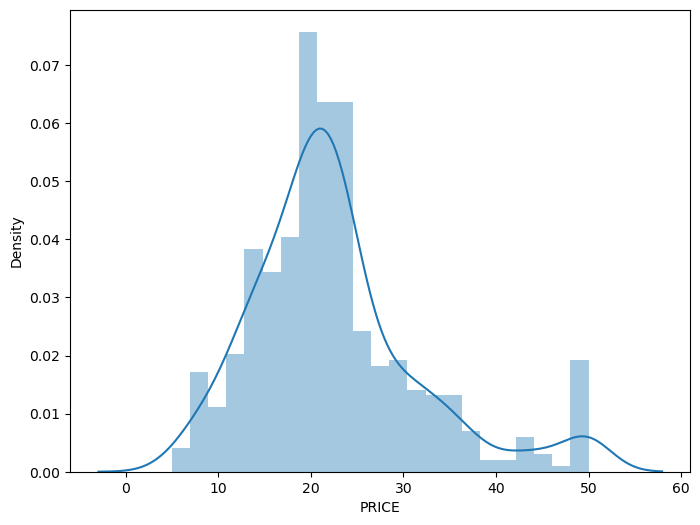

In [354]:
plt.figure(figsize=(8, 6))
sns.distplot(bos_pd['PRICE'])\
# seaborn.distplot() chấp nhận biến dữ liệu làm đối số và trả về biểu đồ có phân bố mật độ

<Axes: >

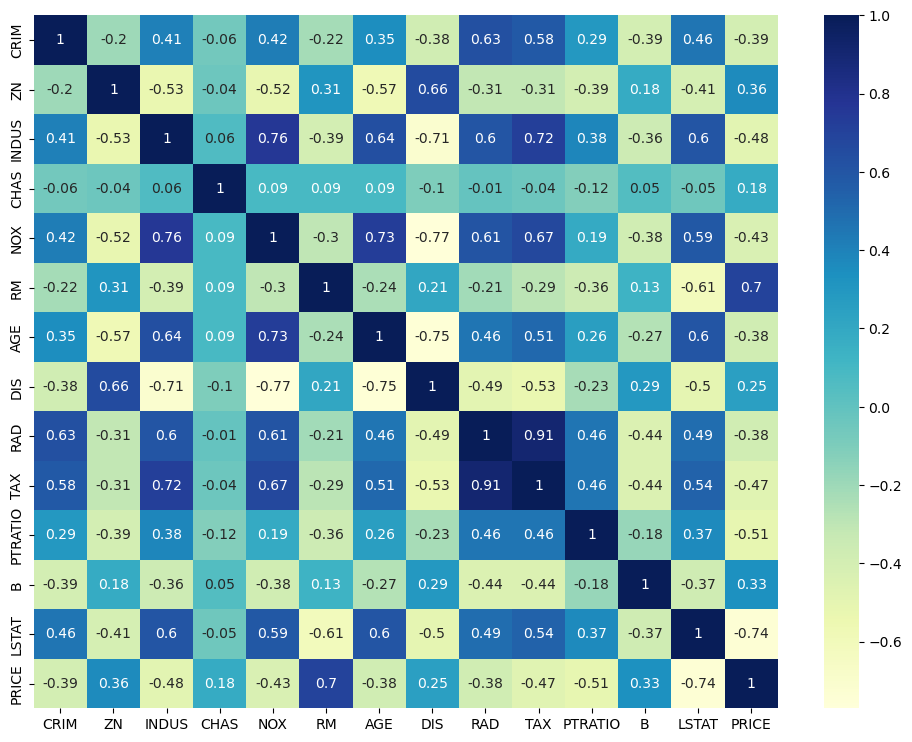

In [355]:
plt.figure(figsize=(12, 9))
correlation_matrix = bos_pd.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
# vẽ biểu đồ bản đồ nhiệt bên dưới dựa trên các giá trị ngẫu nhiên được tạo bởi numpy

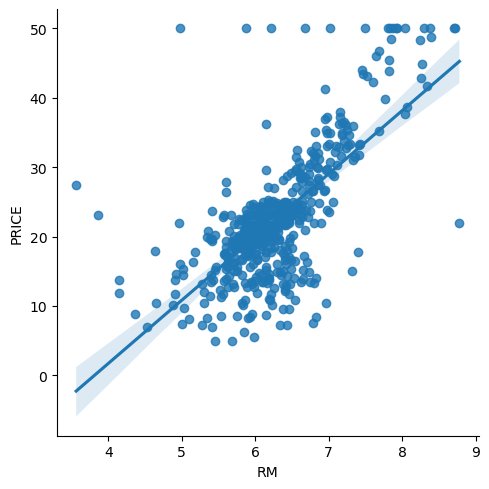

In [356]:
sns.lmplot(x = 'RM', y = 'PRICE', data = bos_pd)
# lmplot vẽ biểu đồ phân tán trên facegrid , với x vs y là cột trong data

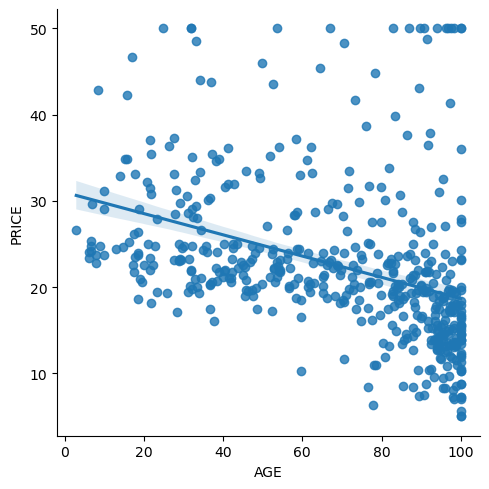

In [357]:
sns.lmplot(x = 'AGE', y = 'PRICE', data = bos_pd)

### StandardScaler vs Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
standard_scale = StandardScaler()
df_stdScale = standard_scale.fit_transform(bos_pd[['RM', 'PRICE']])
df_stdScale[:5]
# StandardScaler

In [ ]:
minmax_scale = MinMaxScaler()
df_minmax = minmax_scale.fit_transform(bos_pd[['RM', 'PRICE']])
df_minmax[:5]

# Normalization

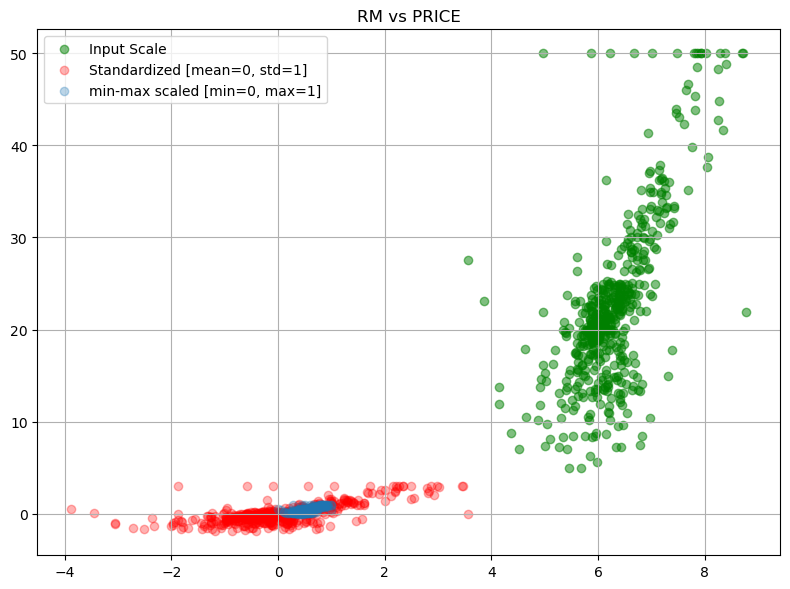

In [394]:
# vẽ biểu đ
plt.figure(figsize=(8,6))
plt.scatter(bos_pd['RM'], bos_pd['PRICE'],color='green', label='Input Scale', alpha=0.5)
plt.scatter(df_stdScale[:, 0], df_stdScale[:, 1],
                color='red', label='Standardized [mean=0, std=1]', alpha=0.3)
plt.scatter(df_minmax[:, 0], df_minmax[:, 1], label='min-max scaled [min=0, max=1]', alpha=0.3)
plt.title('RM vs PRICE')

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

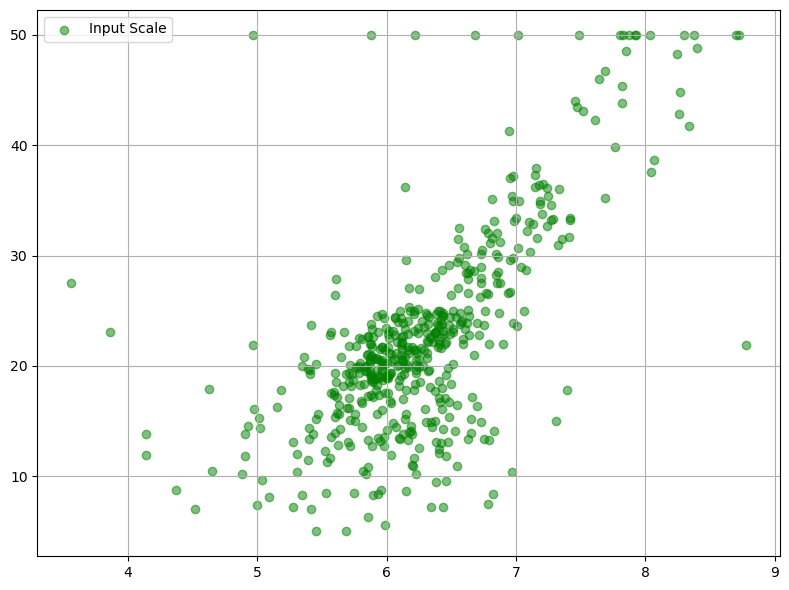

In [398]:
plt.figure(figsize=(8,6))
plt.scatter(bos_pd['RM'], bos_pd['PRICE'],color='green', label='Input Scale', alpha=0.5)


plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

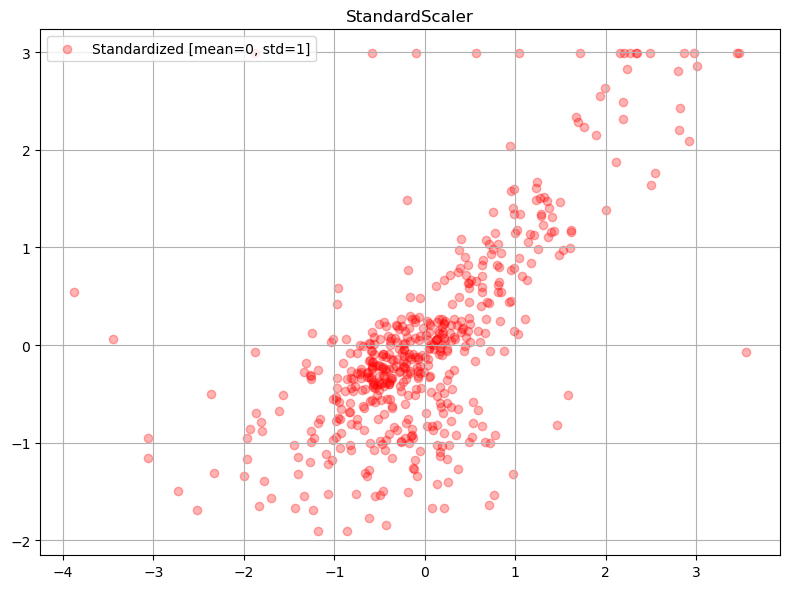

In [399]:
plt.figure(figsize=(8,6))

plt.scatter(df_stdScale[:, 0], df_stdScale[:, 1],
                color='red', label='Standardized [mean=0, std=1]', alpha=0.3)

plt.title('StandardScaler')

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

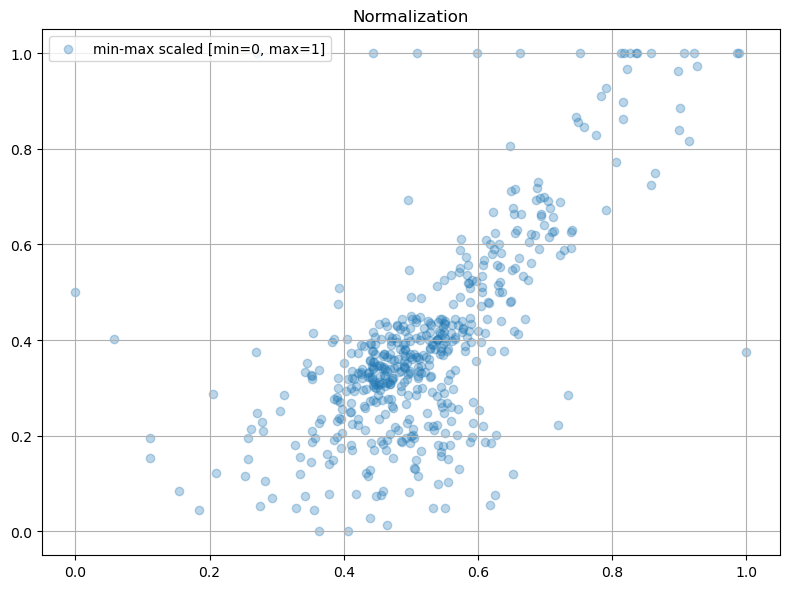

In [400]:
plt.figure(figsize=(8,6))

plt.scatter(df_minmax[:, 0], df_minmax[:, 1], label='min-max scaled [min=0, max=1]', alpha=0.3)
plt.title('Normalization')

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [358]:
# trước khi chia dữ liệu thành tập dữ liệu để train - test, chúng ta cần chia dữ liệu thành hai giá trị : giá trị đích và giá trị dự báo. 
# Gọi giá trị đích Y và các giá trị dự báo X

In [359]:
X_rooms1 = bos_pd.RM
y_price1 = bos_pd.PRICE


X_rooms1 = np.array(X_rooms1).reshape(-1,1)
y_price1 = np.array(y_price1).reshape(-1,1)

print(X_rooms1.shape)
print(y_price1.shape)


(506, 1)
(506, 1)


In [360]:
X_rooms2 = bos_pd.AGE
y_price2 = bos_pd.PRICE


X_rooms2 = np.array(X_rooms2).reshape(-1,1)
y_price2 = np.array(y_price2).reshape(-1,1)

print(X_rooms2.shape)
print(y_price2.shape)

(506, 1)
(506, 1)


In [361]:
# split dữ liệu để train và test với snippet như sau

In [362]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = \
             train_test_split(X_rooms1, y_price1, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [363]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = \
             train_test_split(X_rooms2, y_price2, test_size = 0.2, random_state=5)

print(X_train_2.shape)
print(Y_train_2.shape)
print(X_test_2.shape)
print(Y_test_2.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


## HUấn luyện mô hình

In [ ]:
# chạy hồi quy tuyến tính

In [367]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1,Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [401]:
sum = np.sum((Y_train_1 - y_train_predict_1)**2) 

sum2 = np.sum((Y_train_1-Y_train_1.mean())**2) 

r2_score = round((1 - sum/sum2),2)
print('R2 score is {}'.format(r2_score))

R2 score is 0.43


In [ ]:
# LinearRegression.fit hồi quy tuến tính bình phương tối thiểu thông thường
# rmse Sai số bình phương trung bình gốc hoặc độ lệch bình phương trung bình gốc 
# rmse bằng  phần dư (chênh lệch giữa dự đoán và độ thật) cho từng điểm dữ liệu, tính định mức dư cho từng điểm dữ liệu, tính giá trị trung bình của phần dư và lấy căn bậc hai của giá trị trung bình đó
# R2 hệ số xác đinh , thước đo thống kê về mức độ gần đúng của đường hồi quy với dữ liệu thực tế
# R2 =  1 - u / v
# u là tổng bình phương còn lại ((y_true-y_pred)**2).sum()
# v là tổng bình phương điểm tốt nhất ((y_true - y_true.mean()) ** 2).sum()

In [368]:
reg_2 = LinearRegression()
reg_2.fit(X_train_2, Y_train_2)

y_train_predict_2 = reg_2.predict(X_train_2)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train_2, y_train_predict_2)))
r2 = round(reg_2.score(X_train_2,Y_train_2),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 8.577912204961073
R2 score is 0.14




In [402]:
sum = np.sum((Y_train_2 - y_train_predict_2)**2) 

sum2 = np.sum((Y_train_2-Y_train_2.mean())**2) 

r2_score = round((1 - sum/sum2),2)
print('R2 score is {}'.format(r2_score))

R2 score is 0.14


In [369]:
y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69


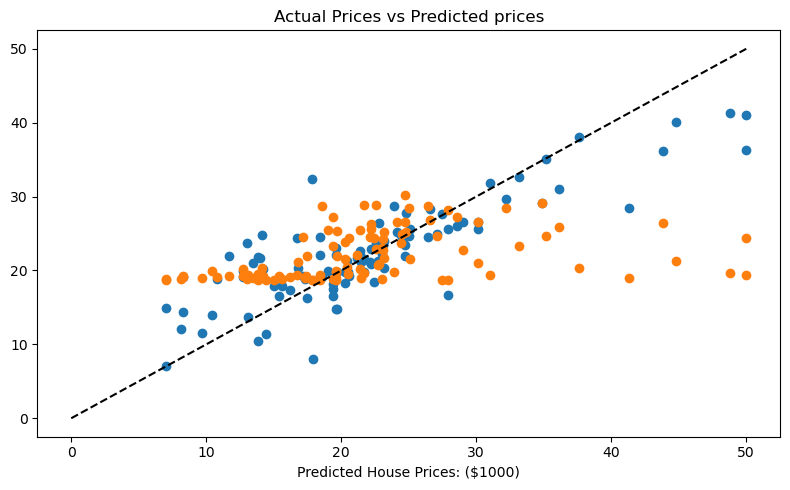

In [403]:
plt.figure(figsize=(8, 5))
plt.scatter(Y_test_1, y_pred_1)
plt.scatter(Y_test_2, y_pred_2)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel("Actual House Prices ($1000)")
plt.xlabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")
plt.tight_layout()


In [371]:
X = bos_pd.drop('PRICE', axis = 1)
y = bos_pd['PRICE']

## Đánh giá mô hình

In [372]:
X = bos_pd.drop('PRICE', axis = 1)
y = bos_pd['PRICE']

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [374]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [375]:
y_train_predict = reg_all.predict(X_train)

In [376]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




In [377]:
# cách tính score không dùng hàm sum
sum = np.sum((y_train - y_train_predict)**2) # tổng bình phương còn lại

sum2 = np.sum((y_train-y_train.mean())**2) # tổng bình phương các điểm tốt nhất

r2_score = round((1 - sum/sum2),2)
print('R2 score is {}'.format(r2_score))


R2 score is 0.75


In [378]:
y_pred = reg_all.predict(X_test)

In [379]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665346
R^2: 0.67


In [380]:
sum = np.sum((y_test - y_pred)**2) # tổng bình phương còn lại

sum2 = np.sum((y_test-y_test.mean())**2) # tổng bình phương các điểm tốt nhất

r2_score = round((1 - sum/sum2),2)
print('R2 score is {}'.format(r2_score))


R2 score is 0.67


In [381]:

sum = np.sum((y_train - y_train_predict)**2)
print(sum)
sum2 = np.sum((y_train-y_train.mean())**2)
print(sum2)
1 - sum/sum2

8743.13075230343
35096.85514851485


0.7508856358979673

In [382]:
print('Coefficient of determination: {:.4f}'.format(metrics.r2_score(y_test, y_pred)))

Coefficient of determination: 0.6688


C:\Users\Minh\AppData\Local\Temp\ipykernel_1348\2332411778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


<Axes: xlabel='PRICE', ylabel='Density'>

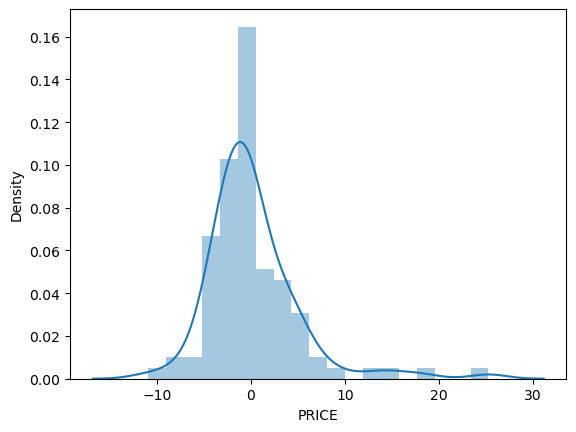

In [383]:
sns.distplot(y_test - y_pred)

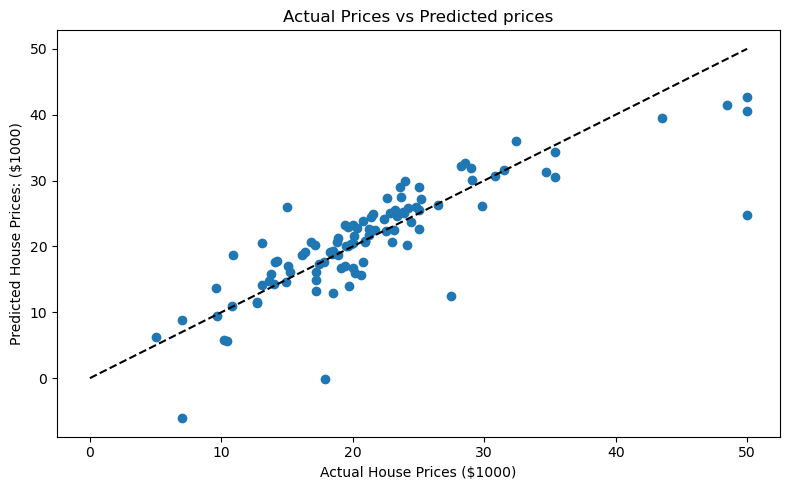

In [384]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")
plt.tight_layout()

In [385]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

RMS: 4.928602182665346 


In [386]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

,Actual,Predicted
173,23.6,28.996724
274,32.4,36.025565
491,13.6,14.816944
72,22.8,25.031979
452,16.1,18.769880
76,20.0,23.254429
316,17.8,17.662538
140,14.0,14.341190
471,19.6,23.013207
500,16.8,20.632456


<Axes: >

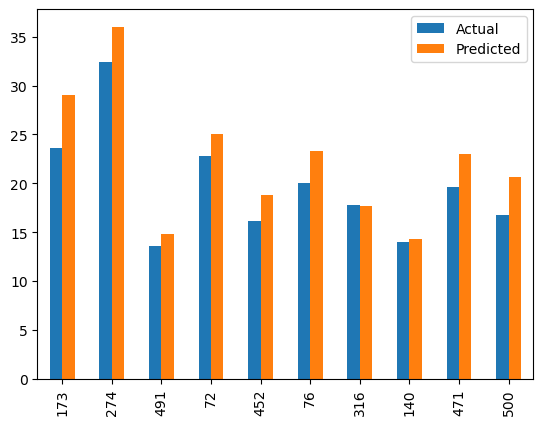

In [387]:
df2.plot(kind='bar')